In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import re
%matplotlib inline

In [3]:
def parse_results_from_file(file_name):

    poly_modulus_regex = r'.*poly_modulus: (.*)'
    load_model_regex = r'.*sw_load_model: (.*)ms'
    encrypt_input_regex = r'.*sw_encrypt_input: (.*)ms'
    run_model_regex = r'.*sw_run_model: (.*)ms'
    decrypt_output_regex = r'.*sw_decrypt_output: (.*)ms'
    global_regex = r'.*sw_global: (.*)ms'
    batch_size_regex = r'.*of (.*) elements'

    runtimes = []
    poly_modulus = None
    load_model = None
    encrypt_input = None
    run_model = None
    decrypt_output = None
    global_time = None
    batch_size = None

    batch_size_count = 0
    with open(file_name) as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            if re.match(poly_modulus_regex, line):
                match = re.match(poly_modulus_regex, line)
                poly_modulus = int(match.groups()[0])
            elif re.match(load_model_regex, line):
                match = re.match(load_model_regex, line)
                load_model = int(match.groups()[0])  
            elif re.match(encrypt_input_regex, line):
                match = re.match(encrypt_input_regex, line)
                encrypt_input = int(match.groups()[0])  
            elif re.match(run_model_regex, line):
                match = re.match(run_model_regex, line)
                run_model = int(match.groups()[0])
            elif re.match(decrypt_output_regex, line):
                match = re.match(decrypt_output_regex, line)
                decrypt_output = int(match.groups()[0])
            elif re.match(global_regex, line):
                match = re.match(global_regex, line)
                global_time = int(match.groups()[0])
            elif re.match(batch_size_regex, line):
                match = re.match(batch_size_regex, line)
                batch_size = int(match.groups()[0])

                batch_size_count += 1

                # Skip warmup:
                if batch_size_count > 1:
                    runtime_tuple = (poly_modulus, batch_size, encrypt_input, run_model, decrypt_output, global_time)
                    
                    print('File: ', file_name, " n: ", poly_modulus, "batch_size: ", batch_size, (encrypt_input, run_model, decrypt_output, global_time))
                    runtimes.append(runtime_tuple)                
                
    return runtimes

In [370]:
all_results = []

# Read exp_0.txt, exp_1.txt, ..., exp_9.txt
file_names_13 = ['exp13_%s.txt' % i for i in range(10)]
file_names_14 = ['exp14_%s.txt' % i for i in range(10)]
file_names = file_names_13 + file_names_14
for file_name in file_names:
    results_from_file = parse_results_from_file(file_name)
    all_results.extend(results_from_file)  

batch_sizes = [2**n for n in range(13)]

sum_results = {8192:{}, 16384:{}}
for batch_size in batch_sizes:
    sum_results[8192][batch_size] = (0, 0, 0, 0)
    sum_results[16384][batch_size] = (0, 0, 0, 0)

for result in all_results:
    n = result[0]
    batch_size = result[1]
    sum_results[n][batch_size] = tuple(map(sum, zip(sum_results[n][batch_size], result[2:])))    
    
print('sum_results', sum_results)    

avg_results = {8192:{}, 16384:{}}
for batch_size in batch_sizes:
    avg_results[8192][batch_size] = [float(x) / len(file_names_13) for x in sum_results[8192][batch_size]]
    avg_results[16384][batch_size] = [float(x) / len(file_names_14) for x in sum_results[16384][batch_size]]

print('avg_results[8192]', avg_results[8192])
print('avg_results[16384]', avg_results[16384])

File:  exp13_0.txt  n:  8192 batch_size:  1 (171, 23963, 139, 24358)
File:  exp13_0.txt  n:  8192 batch_size:  2 (171, 23629, 110, 23997)
File:  exp13_0.txt  n:  8192 batch_size:  4 (267, 22956, 98, 23410)
File:  exp13_0.txt  n:  8192 batch_size:  8 (188, 23112, 105, 23492)
File:  exp13_0.txt  n:  8192 batch_size:  16 (184, 23434, 151, 23854)
File:  exp13_0.txt  n:  8192 batch_size:  32 (219, 22430, 98, 22837)
File:  exp13_0.txt  n:  8192 batch_size:  64 (199, 22686, 133, 23104)
File:  exp13_0.txt  n:  8192 batch_size:  128 (233, 22837, 113, 23273)
File:  exp13_0.txt  n:  8192 batch_size:  256 (194, 22725, 120, 23128)
File:  exp13_0.txt  n:  8192 batch_size:  512 (182, 23234, 102, 23604)
File:  exp13_0.txt  n:  8192 batch_size:  1024 (192, 22984, 120, 23383)
File:  exp13_0.txt  n:  8192 batch_size:  2048 (187, 22486, 137, 22899)
File:  exp13_0.txt  n:  8192 batch_size:  4096 (230, 22387, 138, 22843)
File:  exp13_1.txt  n:  8192 batch_size:  1 (198, 23266, 143, 23696)
File:  exp13_1.txt

File:  exp14_2.txt  n:  16384 batch_size:  512 (336, 64624, 460, 65504)
File:  exp14_2.txt  n:  16384 batch_size:  1024 (328, 65029, 483, 65928)
File:  exp14_2.txt  n:  16384 batch_size:  2048 (357, 65038, 476, 65955)
File:  exp14_2.txt  n:  16384 batch_size:  4096 (326, 64495, 651, 65564)
File:  exp14_3.txt  n:  16384 batch_size:  1 (321, 59604, 359, 60370)
File:  exp14_3.txt  n:  16384 batch_size:  2 (324, 59271, 635, 60319)
File:  exp14_3.txt  n:  16384 batch_size:  4 (348, 58624, 510, 59573)
File:  exp14_3.txt  n:  16384 batch_size:  8 (316, 57235, 401, 58040)
File:  exp14_3.txt  n:  16384 batch_size:  16 (347, 58226, 337, 59003)
File:  exp14_3.txt  n:  16384 batch_size:  32 (363, 57571, 293, 58316)
File:  exp14_3.txt  n:  16384 batch_size:  64 (291, 58609, 473, 59465)
File:  exp14_3.txt  n:  16384 batch_size:  128 (322, 57727, 632, 58765)
File:  exp14_3.txt  n:  16384 batch_size:  256 (306, 58401, 633, 59428)
File:  exp14_3.txt  n:  16384 batch_size:  512 (299, 58875, 613, 59877)


# Figure 5: SIMD

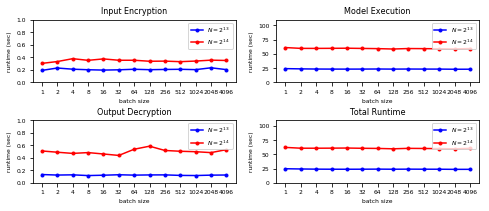

In [371]:
batch_sizes = [2**n for n in range(13)]

N13_encryption = [avg_results[8192][bs][0]/1000. for bs in batch_sizes]
N14_encryption = [avg_results[16384][bs][0]/1000. for bs in batch_sizes]
N13_execution = [avg_results[8192][bs][1]/1000. for bs in batch_sizes]
N14_execution = [avg_results[16384][bs][1]/1000. for bs in batch_sizes]
N13_decryption = [avg_results[8192][bs][2]/1000. for bs in batch_sizes]
N14_decryption = [avg_results[16384][bs][2]/1000. for bs in batch_sizes]
N13_total = [avg_results[8192][bs][3]/1000. for bs in batch_sizes]
N14_total = [avg_results[16384][bs][3]/1000. for bs in batch_sizes]

fig, axarr = plt.subplots(2, 2, figsize=(8,3))

#fig, ax = plt.subplots()
ax = axarr[0,0]
ax.plot(batch_sizes, N13_encryption, marker='.', color='b', label=r'$N=2^{13}$')
# ax.errorbar(batch_sizes, sw_encrypt_input_means_13, yerr=sw_encrypt_input_stds_13, fmt='o', color='b')
ax.plot(batch_sizes, N14_encryption, marker='.', color='r', label=r'$N=2^{14}$')
# ax.errorbar(batch_sizes, sw_encrypt_input_means_14, yerr=sw_encrypt_input_stds_14, fmt='o', color='r')
ax.set_xscale('log', basex=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_title("Input Encryption", fontsize=8)
plt.xticks(batch_sizes)
ax.set_xticks(batch_sizes)
ax.set_xlabel("batch size", fontsize=6)
ax.set_ylabel("runtime (sec)", fontsize=6)
ax.set_ylim((0, 1))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.legend(loc='upper right', prop={'size': 6})

#fig, ax = plt.subplots()
ax = axarr[0,1]
ax.plot(batch_sizes, N13_execution, marker='.', color='b', label=r'$N=2^{13}$')
# ax.errorbar(batch_sizes, sw_run_model_means_13, yerr=sw_run_model_stds_13, fmt='o', color='b')
ax.plot(batch_sizes, N14_execution, marker='.', color='r', label=r'$N=2^{14}$')
# ax.errorbar(batch_sizes, sw_run_model_means_14, yerr=sw_run_model_stds_14, fmt='o', color='r')
ax.set_xscale('log', basex=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_title("Model Execution", fontsize=8)
plt.xticks(batch_sizes)
ax.set_xticks(batch_sizes)
ax.set_xlabel("batch size", fontsize=6)
ax.set_ylabel("runtime (sec)", fontsize=6)
ax.set_ylim((0, 110))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.legend(prop={'size': 8})
ax.legend(loc='upper right', prop={'size': 6})

#fig, ax = plt.subplots()
ax = axarr[1, 0]
ax.plot(batch_sizes, N13_decryption, marker='.', color='b', label=r'$N=2^{13}$')
# ax.errorbar(batch_sizes, sw_decrypt_output_means_13, yerr=sw_decrypt_output_stds_13, fmt='o', color='b')
ax.plot(batch_sizes, N14_decryption, marker='.', color='r', label=r'$N=2^{14}$')
# ax.errorbar(batch_sizes, sw_decrypt_output_means_14, yerr=sw_decrypt_output_stds_14, fmt='o', color='r')
ax.set_xscale('log', basex=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_title("Output Decryption", fontsize=8)
plt.xticks(batch_sizes)
ax.set_xticks(batch_sizes)
ax.set_xlabel("batch size", fontsize=6)
ax.set_ylabel("runtime (sec)", fontsize=6)
ax.set_ylim((0, 1))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.legend(prop={'size': 8})
ax.legend(loc='upper right', prop={'size': 6})

ax = axarr[1,1]
#fig, ax = plt.subplots()
ax.plot(batch_sizes, N13_total, marker='.', color='b', label=r'$N=2^{13}$')
# ax.errorbar(batch_sizes, sw_ec_run_dc_means_13, yerr=sw_ec_run_dc_stds_13, fmt='o', color='b')
ax.plot(batch_sizes, N14_total, marker='.', color='r', label=r'$N=2^{14}$')
# ax.errorbar(batch_sizes, sw_ec_run_dc_means_14, yerr=sw_ec_run_dc_stds_14, fmt='o', color='r')
ax.set_xscale('log', basex=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_title("Total Runtime", fontsize=8)
ax.set_xticks(batch_sizes)
ax.set_xlabel("batch size", fontsize=6)
ax.set_ylabel("runtime (sec)", fontsize=6)
ax.set_ylim((0, 110))
ax.tick_params(axis='both', which='major', labelsize=6)
ax.legend(loc='upper right', prop={'size': 6})

fig.subplots_adjust(hspace=0.6, wspace=0.2)

plt.savefig('Figure5.png', dpi=300, bbox_inches='tight')
plt.show()


# Table 1

In [96]:
from datetime import datetime

def parse_results_from_tf_file(file_name):

    start_cpp_timer = r'(.*) Marking arg 0 is_static: 0'
    end_cpp_timer = r'(.*) NGraphEncapsulateOp::Compute call done for cluster (.*)'
    python_timer = r'.*total time (.*): (.*)'

    start_cpp_time = None
    end_cpp_time = None
    python_time = None
    
    cpp_times = []
    python_times = []

    batch_size_count = 0
    with open(file_name) as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            if re.match(start_cpp_timer, line):
                match = re.match(start_cpp_timer, line)
                match_line = match.groups()[0]
                date = match_line.split(' ')[1].strip(':')
                start_cpp_time = datetime.strptime(date, '%H:%M:%S.%f')
                #print('start_cpp_time', start_cpp_time)
            elif re.match(end_cpp_timer, line):
                match = re.match(end_cpp_timer, line)
                match_line = match.groups()[0]
                date = match_line.split(' ')[1].strip(':')
                end_cpp_time = datetime.strptime(date, '%H:%M:%S.%f')
                #print('end_cpp_time', end_cpp_time)
            elif re.match(python_timer, line):
                match = re.match(python_timer, line)
                python_time = float(match.groups()[1])

                cpp_time = end_cpp_time - start_cpp_time
                cpp_times.append(cpp_time.total_seconds())
                python_times.append(python_time)
    assert(len(cpp_times) == 10)            
    
    return python_times, cpp_times

# N=2^13 results

In [97]:
python_13_times, cpp_13_times = parse_results_from_tf_file("TF_integration_results/python_13.txt")

print('python', python_13_times)
print('C++', cpp_13_times)

print('Python n=2^13: ', np.round(np.mean(python_13_times), 2), '$\\pm$', np.round(np.std(python_13_times),2))
print('C++    n=2^13: ', np.round(np.mean(cpp_13_times), 2), '$\\pm$', np.round(np.std(cpp_13_times),2))

print('TF overhead:',(np.mean(python_13_times) - np.mean(cpp_13_times)) / np.mean(cpp_13_times) * 100,'%')

python [27.01756262779236, 25.636876583099365, 26.816718101501465, 25.046579837799072, 25.116824865341187, 25.022016525268555, 24.80589246749878, 25.094730854034424, 24.48110842704773, 25.757550716400146]
C++ [26.821173, 25.443331, 26.495526, 24.809475, 24.919835, 24.704233, 24.610679, 24.784347, 24.281735, 25.490549]
Python n=2^13:  25.48 $\pm$ 0.8
C++    n=2^13:  25.24 $\pm$ 0.79
TF overhead: 0.964879333451654 %


# N=2^14 results

In [98]:
python_14_times, cpp_14_times = parse_results_from_tf_file("TF_integration_results/python_14.txt")

print('python', python_14_times)
print('C++', cpp_14_times)

print('Python n=2^14: ', np.round(np.mean(python_14_times), 5), '$\\pm$', np.round(np.std(python_14_times),2))
print('C++    n=2^14: ', np.round(np.mean(cpp_14_times), 2), '$\\pm$', np.round(np.std(cpp_14_times),2))

print('TF overhead:',(np.mean(python_14_times) - np.mean(cpp_14_times)) / np.mean(cpp_14_times) * 100,'%')

python [66.24554800987244, 71.52276301383972, 65.50046730041504, 64.34430050849915, 65.2794771194458, 63.65562701225281, 63.55569386482239, 63.718220710754395, 63.902135372161865, 64.04248690605164]
C++ [65.654855, 70.913539, 64.942181, 63.856341, 64.88968, 63.098035, 63.073276, 63.125425, 63.379029, 63.427987]
Python n=2^14:  65.17667 $\pm$ 2.28
C++    n=2^14:  64.64 $\pm$ 2.27
TF overhead: 0.8364330879584423 %
